# Using the Experiment class

In [1]:
import phial.experiment as ws
import phial.toolbox  as tb
import phial.node_functions as nf
from phial.experiment import Experiment
from phial.utils import tic,toc
tic() # start tracking time of Notebook load

CPU times: user 282 ms, sys: 529 ms, total: 811 ms
Wall time: 596 ms


{'timestamp': '2020-05-13 13:46:34.977971',
 'duration': 0.4736653158906847,
 'results': {'010': {'phi': 0.243056, 'elapsed_seconds': 0.10145467915572226},
  '111': {'phi': 0.499999, 'elapsed_seconds': 0.09138617315329611},
  '000': {'phi': 0.194445, 'elapsed_seconds': 0.09323669201694429},
  '001': {'phi': 0.243056, 'elapsed_seconds': 0.09262525499798357},
  '100': {'phi': 0.243056, 'elapsed_seconds': 0.09417020995169878}},
 'filename': None,
 'uname': uname_result(system='Linux', node='chimp20', release='5.3.0-51-generic', version='#44~18.04.2-Ubuntu SMP Thu Apr 23 14:27:18 UTC 2020', machine='x86_64', processor='x86_64')}

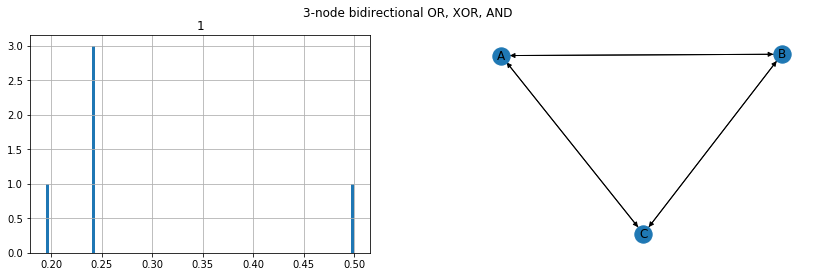

In [2]:
exp = Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=nf.OR_func, B=nf.AND_func, C=nf.XOR_func),
    title='3-node bidirectional OR, XOR, AND',  
    comment = 'Used in Mayner 2018 paper',
)
%time exp.run(plot=True)
exp.info()

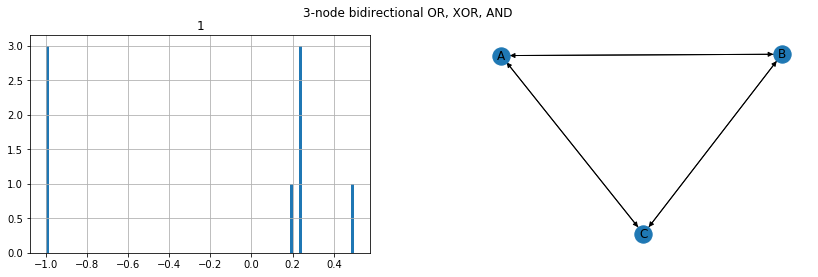

In [3]:
exp.analyze(countUnreachable=True)

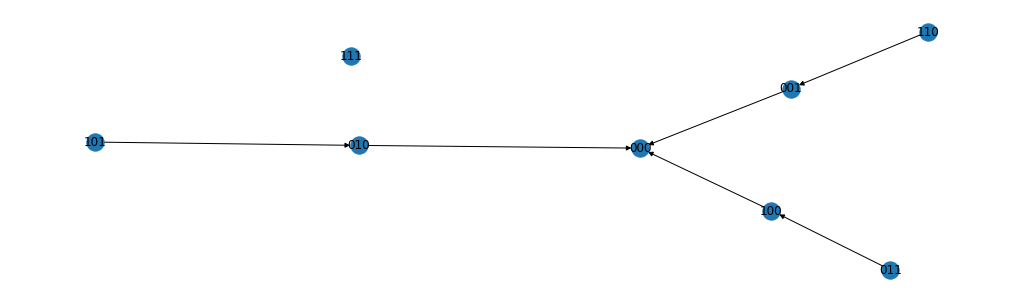

In [4]:
exp.net.draw_states()

In [5]:
exp.net.tpm

,A,B,C
000,0,0,0
100,0,0,0
010,0,0,0
110,0,0,1
001,0,0,0
101,0,1,0
011,1,0,0
111,1,1,1


In [6]:
dict(zip(range(len(exp.net.tpm.index)), exp.net.tpm.index))

{0: '000',
 1: '100',
 2: '010',
 3: '110',
 4: '001',
 5: '101',
 6: '011',
 7: '111'}